In [5]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit.ml.datasets import *
from qiskit import BasicAer
from qiskit.aqua import QuantumInstance
from qiskit.aqua.components.feature_maps import SecondOrderExpansion
from qiskit.aqua.algorithms import QSVM
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name
from qiskit.providers.ibmq import least_busy
import time

In [6]:
from qiskit import IBMQ
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [7]:
token = 'PUT_YOUR_IBMQ_TOKEN_HERE'
IBMQ.save_account(token)
IBMQ.update_account()
provider = IBMQ.load_account()

configrc.store_credentials:WARNING:2020-08-08 10:29:48,289: Credentials already present. Set overwrite=True to overwrite.


Found 1 credentials.
No credentials available for updating could be found. No action will be performed.
Warnings:
The stored account with url "https://auth.quantum-computing.ibm.com/api" is already an IBM Q Experience v2 account.


ibmqfactory.load_account:WARNING:2020-08-08 10:29:49,067: Credentials are already in use. The existing account in the session will be replaced.


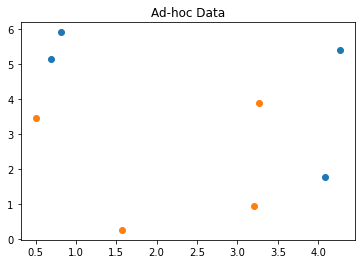

{'A': 0, 'B': 1}


<ipython-input-8-de517c9a4d1b>:18: DeprecationWarning: The qiskit.aqua.components.feature_maps.SecondOrderExpansion object is deprecated as of 0.7.0 and will be removed no sooner than 3 months after the release. You should use qiskit.circuit.library.ZZFeatureMap instead.
  feature_map = SecondOrderExpansion(feature_dimension=feature_dim, depth=2, entangler_map=[[0, 1]])
c:\users\user\.conda\envs\qiskit_may2020\lib\site-packages\qiskit\aqua\components\feature_maps\second_order_expansion.py:58: DeprecationWarning: The qiskit.aqua.components.feature_maps.PauliZExpansion class is deprecated as of 0.7.0 and will be removed no sooner than 3 months after the release. You should use qiskit.circuit.library.PauliFeatureMap instead.
  super().__init__(feature_dimension, depth, entangler_map, entanglement,
c:\users\user\.conda\envs\qiskit_may2020\lib\site-packages\qiskit\aqua\components\feature_maps\pauli_z_expansion.py:70: DeprecationWarning: The qiskit.aqua.components.feature_maps.PauliExpansion

Training Time: 0.53s seconds


In [8]:
feature_dim = 2 # dimension of each data point
training_dataset_size = 4
testing_dataset_size = 2
random_seed = 10598
shots = 1024
num_qubits = 2

sample_Total, training_input, test_input, class_labels = ad_hoc_data(
    training_size=training_dataset_size, 
    test_size=testing_dataset_size, 
    n=feature_dim, gap=0.3,plot_data=True
)
datapoints, class_to_label = split_dataset_to_data_and_labels(test_input)
print(class_to_label)

#backend = provider.get_backend('ibmq_5_yorktown')
backend = BasicAer.get_backend('qasm_simulator')
feature_map = SecondOrderExpansion(feature_dimension=feature_dim, depth=2, entangler_map=[[0, 1]])
svm = QSVM(feature_map, training_input, test_input, None)# the data for prediction can be fed later.
svm.random_seed = random_seed
quantum_instance = QuantumInstance(backend, shots=shots, seed_simulator=random_seed, seed_transpiler=random_seed)
start_time=time.time()
result = svm.run(quantum_instance)
print("Training Time: %.2gs seconds" % (time.time() - start_time))

kernel matrix during the training:


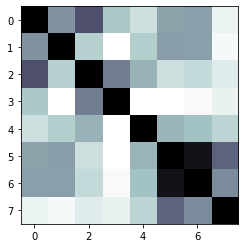

testing success ratio:  0.75


In [9]:
print("kernel matrix during the training:")
kernel_matrix = result['kernel_matrix_training']
img = plt.imshow(np.asmatrix(kernel_matrix),interpolation='nearest',origin='upper',cmap='bone_r')
#X, y = make_blobs(n_samples=50, centers=2,random_state=0, cluster_std=0.60)
#plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');
plt.show()
#data= np.asmatrix(kernel_matrix)
print("testing success ratio: ", result['testing_accuracy'])

In [10]:
predicted_labels = svm.predict(datapoints[0])

predicted_classes = map_label_to_class_name(predicted_labels, svm.label_to_class)
print("ground truth: {}".format(datapoints[1]))
print("prediction:   {}".format(predicted_labels))

ground truth: [0 0 1 1]
prediction:   [0 0 1 0]
